#Residual Network tutorial by Aditya

**Introduction:**

Residual Networks (ResNets) are a class of deep neural networks introduced by Kaiming He et al. in their 2015 paper "Deep Residual Learning for Image Recognition." ResNets were designed to address the problem of vanishing gradients in very deep neural networks, allowing for the training of extremely deep models.

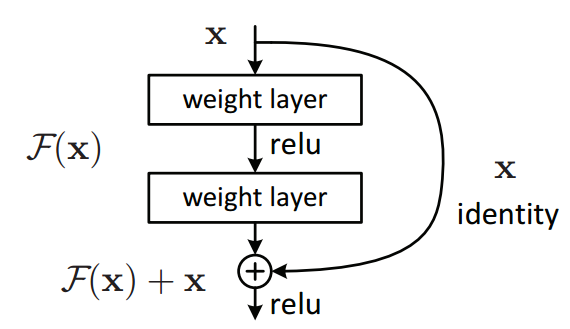

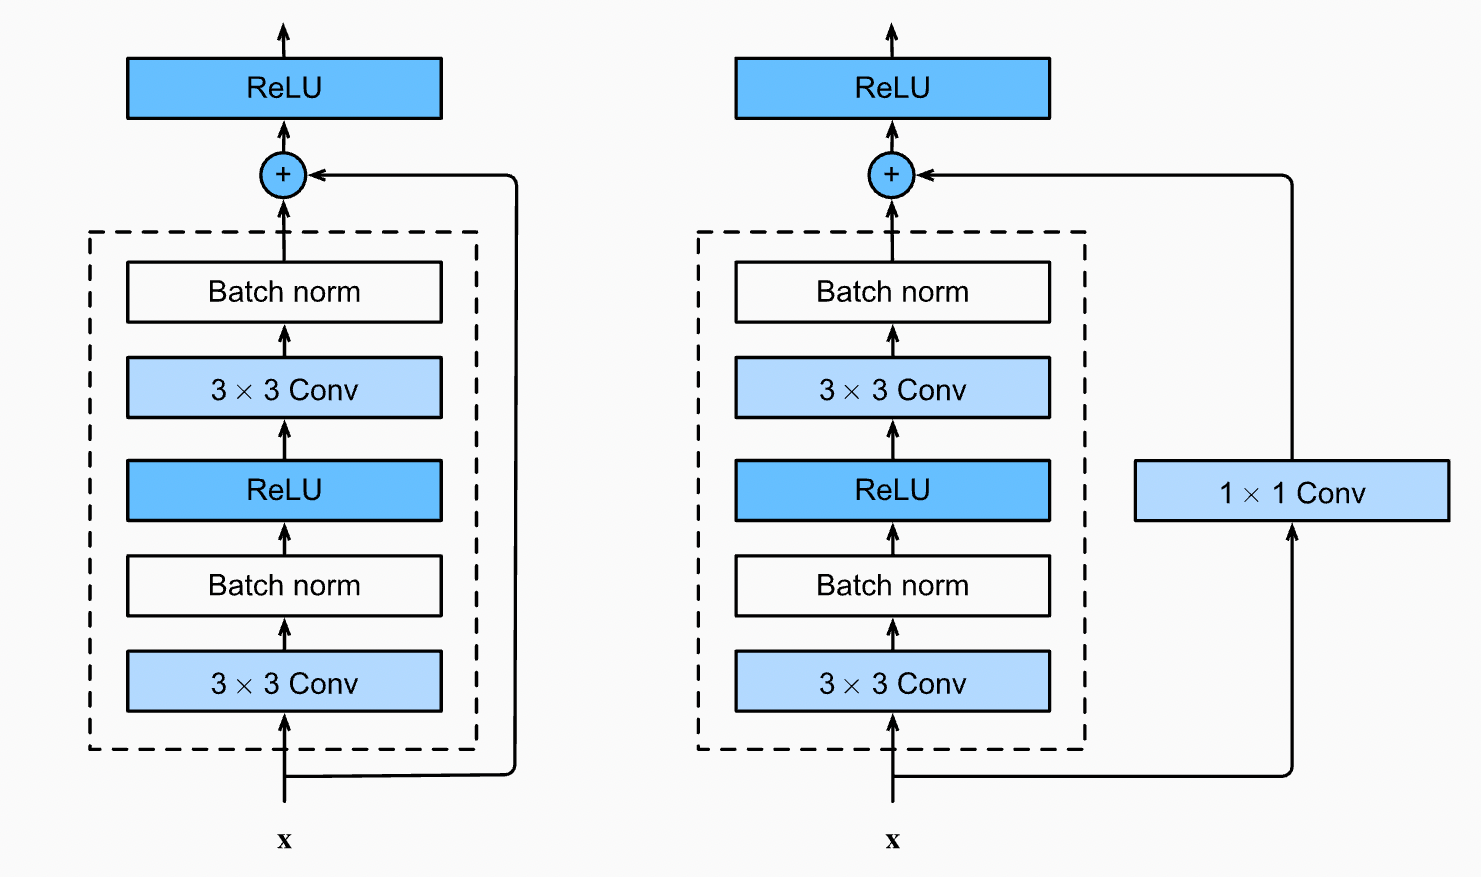

In [ ]:
import os
path = '/content/drive/MyDrive/rooms_dataset'
room_paths = os.listdir(path)
room_paths

['bed_room', 'dining_room', 'living_room']

In [ ]:
rooms = []

for item in room_paths:
 # Get all the file names
 all_rooms = os.listdir('/content/drive/MyDrive/rooms_dataset' + '/' +item)
 print(all_rooms)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('/content/drive/MyDrive/rooms_dataset' + '/' +item) + '/' + room))
    print(rooms[:1])

['bed-2579798__340.jpg', 'bed-2345538__340 (1).jpg', 'bed-187114__340.jpg', 'bed-2345538__340.jpg', 'bed-187114__340 (1).jpg', 'bed-1846251__340.jpg', 'bed-186346__340.jpg', 'bed-1853443__340.jpg', 'bed-142516__340.jpg', 'bed-1303451__340.jpg', 'bed-1853907__340.jpg', 'apartment-2094734__340.jpg', 'apartment-4744139__340.jpg', 'bath-753272__340.jpg', 'architecture-2141065__340.jpg', 'baby-1266117__340.jpg', 'bed-1232590__340.jpg', 'bed-1303451__340 (1).jpg', 'bed-1048194__340.jpg', 'architecture-modern-house-beautiful-interiors-260nw-278631791.jpg', 'hotel-3102375__340.jpg', 'hotel-2037166__340.jpg', 'home-2314519__340.jpg', 'environment-684126__340.jpg', 'family-3288866__340.jpg', 'hotel-1749602__340.jpg', 'hotel-2037166__340 (1).jpg', 'doll-room-1426009__340.jpg', 'cruise-4572829__340 (1).jpg', 'cruise-4572829__340.jpg', 'couple-room-1613619__340.jpg', 'couple-room-1613619__340 (1).jpg', 'cat-2605021__340.jpg', 'cheese-4797440__340.jpg', 'cot-312424__340.png', 'books-book-shopping-ol

In [ ]:
import pandas as pd
import numpy as np
# Build a dataframe
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
#print(rooms_df.head())
#print(rooms_df.tail())

In [ ]:
  # Let's check how many samples for each category are present
  print("Total number of rooms in the dataset: ", len(rooms_df))

  room_count = rooms_df['room type'].value_counts()

  #print("rooms in each category: ")
  #print(room_count)

Total number of rooms in the dataset:  393


In [ ]:
import cv2
path = '/content/drive/MyDrive/rooms_dataset/'


im_size = 64

images = []
labels = []

for i in room_paths:
    data_path = path + str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    filenames = [i for i in os.listdir(data_path) ]
   # print(filenames)  # will get the names of all images
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
labels

['bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',

In [ ]:
# Transform the image array to a numpy type
images = np.array(images)
images.shape

(393, 64, 64, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Extracting target variable 'room type'
y = rooms_df['room type'].values

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Reshape and one-hot encode the target variable
y_encoded = y_encoded.reshape(-1, 1)
onehot_encoder = OneHotEncoder()
Y = onehot_encoder.fit_transform(y_encoded)

# Shuffle data
images, Y = shuffle(images, Y, random_state=1)

# Split data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

train_y_dense = train_y.toarray()

test_y_dense = test_y.toarray()

print(type(train_y))

# Inspect the shape of the training and testing sets
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(373, 64, 64, 3)
(373, 3)
(20, 64, 64, 3)
(20, 3)


In [ ]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [ ]:
# x is input, y=F(x)
# identity block simply means input should be equal to output.
#  y = x + F(x)   the layers in a traditional network are learning the true output H(x)
# F(x) = y - x   the layers in a residual network are learning the residual F(x)
# Hence, the name: Residual Block.



def identity_block(X, f, filters, stage, block):
    """

    Arguments:
    X -- input of shape (m, height, width, channel)
    f -- shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Saving the input value.we need this later to add to the output.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)


    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    # First layer
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)  # normalization on channels
    X = Activation('relu')(X)


    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)


    return X

In [ ]:
#Each ResNet block is either 2 layer deep
def ResNet50(input_shape=(64, 64, 3), classes=3):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X) #64 filters of 7*7
    X = BatchNormalization(axis=3, name='bn_conv1')(X) #batchnorm applied on channels
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) #window size is 3*3

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    # convolutional_block is a function defined above. Convolutional_block have 3 layers.
    #filters=[64, 64, 256] first 64 is for 1st layer and 2nd 64 is for 2nd layer and 256 is for 3rd layer of convultional block
    # below are the conv layers from convolutional_block function
    #X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)

    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)

    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)


    ### START CODE HERE ###

    # Stage 3
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)


    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (64, 64, 3), classes = 3)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 70, 70, 3)            0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 32, 32, 64)           9472      ['zero_padding2d_2[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1[0][0]']        

In [ ]:
model.fit(train_x, train_y_dense, epochs = 6, batch_size = 32)

Epoch 1/6
12/12 [==============================] - 79s 4s/step - loss: 3.5382 - accuracy: 0.3539
Epoch 2/6
12/12 [==============================] - 54s 5s/step - loss: 1.6788 - accuracy: 0.4531
Epoch 3/6
12/12 [==============================] - 54s 5s/step - loss: 1.3240 - accuracy: 0.5228
Epoch 4/6
12/12 [==============================] - 52s 4s/step - loss: 1.1273 - accuracy: 0.5818
Epoch 5/6
12/12 [==============================] - 54s 4s/step - loss: 0.9505 - accuracy: 0.8070
Epoch 6/6
12/12 [==============================] - 62s 5s/step - loss: 0.6807 - accuracy: 0.8284


In [ ]:
from matplotlib.pyplot import imread
def prd(img_path):
  img = image.load_img(img_path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  print('Input image shape:', x.shape)
  my_image = imread(img_path)
  imshow(my_image)
  prediction = list(model.predict(x))
  out = prediction[0].tolist()
  print(out)

  if out[0] > 0.5 :
    return 'Bed Room'
  elif out[1] > 0.5 :
    return 'Dinning Room'
  elif out[2] > 0.5 :
    return 'Living Room'
  else :
    return 'Prediction is difficult in this case'


Input image shape: (1, 64, 64, 3)
1/1 [==============================] - 0s 56ms/step


'Bed Room'

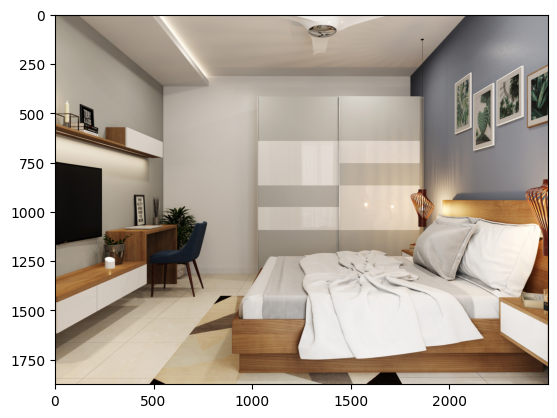

In [ ]:
prd('/content/test_image.jpg')